### aim: visualize key summary plots from modelClimatologyandTrends, observationalClimatologyandTrends

### date: 2023-04-12

In [74]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [75]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [76]:
import numpy as np
from cmocean import cm
import matplotlib.pyplot as plt
import xarray as xr

import glob
import pandas as pd
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

## preliminary: load data and visualize

#### model timeseries

In [77]:
salt_clim_mod = xr.open_dataset('./intermediateProducts/SS1500_salinity_1980-2018-climatology.nc')
temp_clim_mod  = xr.open_dataset('./intermediateProducts/SS1500_temperature_1980-2018-climatology.nc')
salt_bm_mod = xr.open_dataset('./intermediateProducts/SS1500_salinity_1980-2018-bimonthly_timeseries.nc')
temp_bm_mod = xr.open_dataset('./intermediateProducts/SS1500_temperature_1980-2018-bimonthly_timeseries.nc')

salt_clim_obs = xr.open_dataset('./intermediateProducts/obs_salinity_1980-2018-climatology.nc')
temp_clim_obs  = xr.open_dataset('./intermediateProducts/obs_temperature_1980-2018-climatology.nc')
salt_bm_obs = xr.open_dataset('./intermediateProducts/obs_salinity_1980-2018-bimonthly_timeseries.nc')
temp_bm_obs = xr.open_dataset('./intermediateProducts/obs_temperature_1980-2018-bimonthly_timeseries.nc')

### just to get an array of timeperiods (could be done cleaner)
ds2 = xr.open_dataset('./intermediateProducts/model_ts_timeseries_bimonthly.nc')

In [78]:
fact = 1.1

Text(0.5, 0.98, 'model climatology of T and S \n biweekly time-periods')

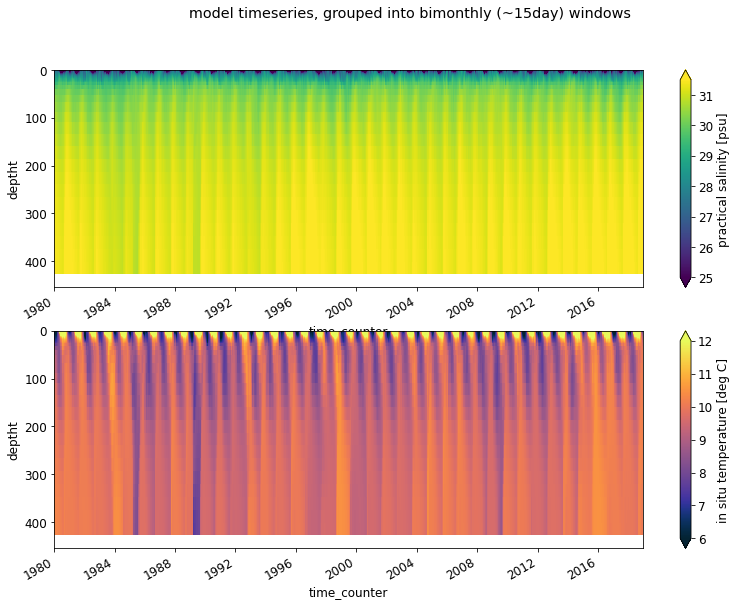

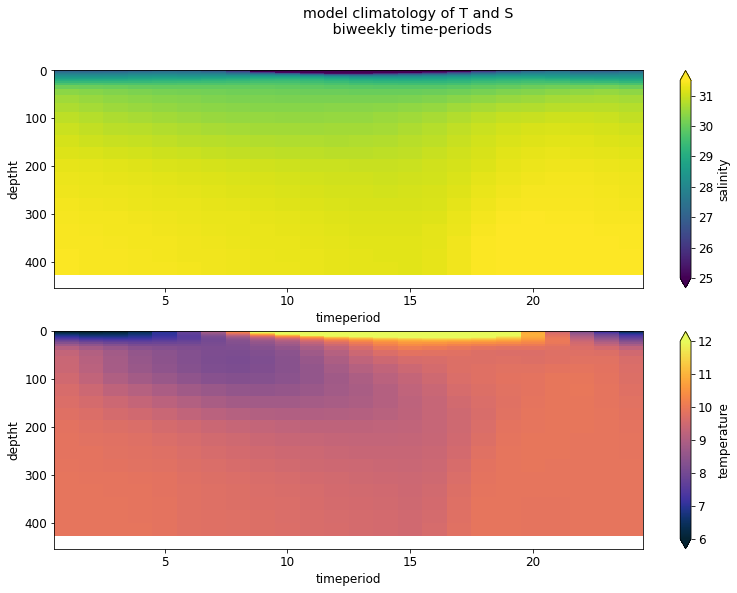

In [79]:
## model biweekly timeseries
fig, axs = plt.subplots(2,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

xr.plot.pcolormesh(salt_bm_mod.salinity, ax = axs[0], vmin = 25, vmax = 31.5)
xr.plot.pcolormesh(temp_bm_mod.temperature, ax = axs[1], cmap = cm.thermal, vmin = 6, vmax = 12)

axs[0].invert_yaxis()
axs[1].invert_yaxis()

plt.suptitle('model timeseries, grouped into bimonthly (~15day) windows')

### model climatology
fact = 1.1
fig, axs = plt.subplots(2,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
xr.plot.pcolormesh(salt_clim_mod.salinity, ax = axs[0], vmin = 25, vmax = 31.5)
xr.plot.pcolormesh(temp_clim_mod.temperature, ax = axs[1], cmap = cm.thermal, vmin = 6, vmax = 12)

axs[0].invert_yaxis()
axs[1].invert_yaxis()

fig.suptitle('model climatology of T and S \n biweekly time-periods')



#### observational timeseries

Text(0.5, 0.98, 'observational climatology of T and S \n biweekly time-periods')

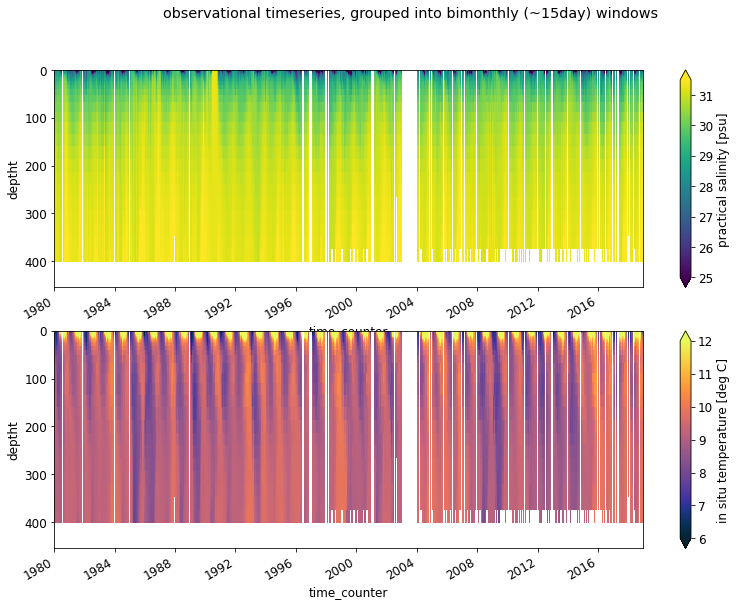

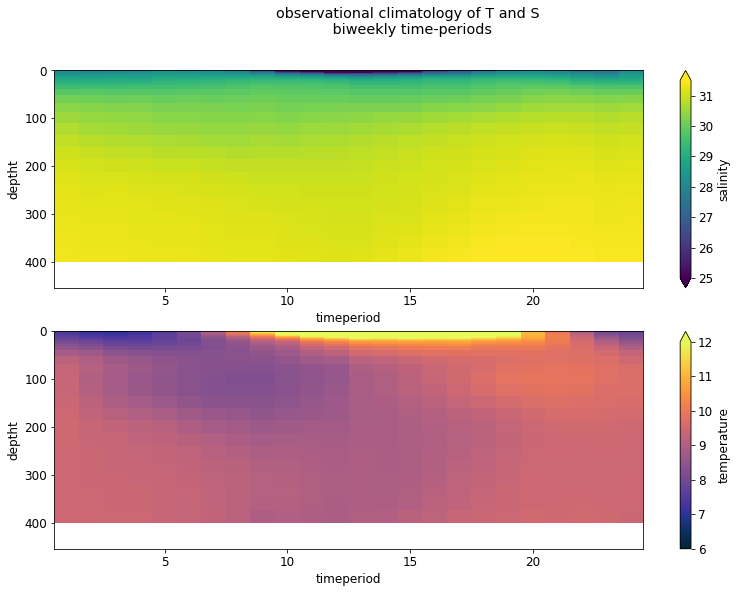

In [80]:
## observational biweekly timeseries
fig, axs = plt.subplots(2,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

xr.plot.pcolormesh(salt_bm_obs.salinity, ax = axs[0], vmin = 25, vmax = 31.5)
xr.plot.pcolormesh(temp_bm_obs.temperature, ax = axs[1], cmap = cm.thermal, vmin = 6, vmax = 12)

axs[0].invert_yaxis()
axs[1].invert_yaxis()

plt.suptitle('observational timeseries, grouped into bimonthly (~15day) windows')

### observational climatology
fact = 1.1
fig, axs = plt.subplots(2,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
xr.plot.pcolormesh(salt_clim_obs.salinity, ax = axs[0], vmin = 25, vmax = 31.5)
xr.plot.pcolormesh(temp_clim_obs.temperature, ax = axs[1], cmap = cm.thermal, vmin = 6, vmax = 12)

axs[0].invert_yaxis()
axs[1].invert_yaxis()

fig.suptitle('observational climatology of T and S \n biweekly time-periods')



## plot B) 

plot model-obs (climatology - climatology, starting with 1980 for both as per yr note)

Text(0.5, 0.98, 'climatology (model - observations), T and S, biweekly time-periods')

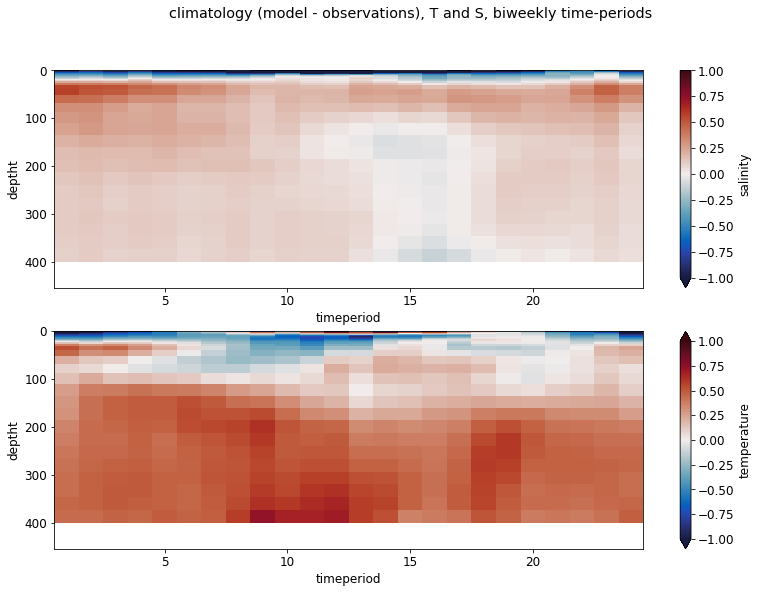

In [81]:

### observational climatology
fact = 1.1
fig, axs = plt.subplots(2,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
xr.plot.pcolormesh(salt_clim_mod.salinity - salt_clim_obs.salinity, ax = axs[0], vmin = -1, vmax = 1, cmap = cm.balance)
xr.plot.pcolormesh(temp_clim_mod.temperature- temp_clim_obs.temperature, ax = axs[1], cmap = cm.balance, vmin = -1, vmax = 1)

axs[0].invert_yaxis()
axs[1].invert_yaxis()

fig.suptitle('climatology (model - observations), T and S, biweekly time-periods')



## plot C) timeseries - timeseries

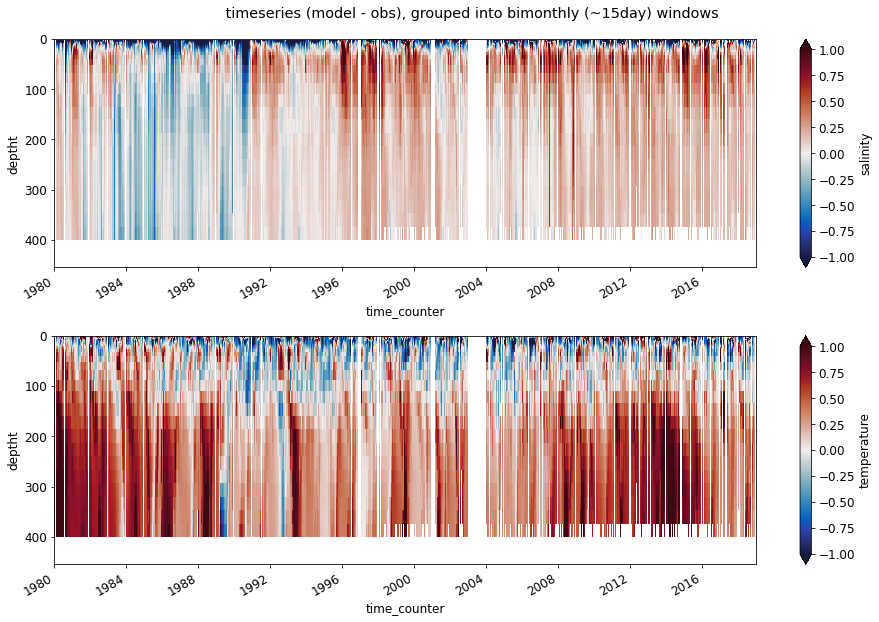

In [82]:
## observational biweekly timeseries
fig, axs = plt.subplots(2,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
tvmin = -1; tvmax = 1

xr.plot.pcolormesh(salt_bm_mod.salinity - salt_bm_obs.salinity, ax = axs[0], cmap = cm.balance, vmin = tvmin, vmax = tvmax)
xr.plot.pcolormesh(temp_bm_mod.temperature - temp_bm_obs.temperature, ax = axs[1], cmap = cm.balance, vmin = tvmin, vmax = tvmax)

axs[0].invert_yaxis()
axs[1].invert_yaxis()

plt.suptitle(' timeseries (model - obs), grouped into bimonthly (~15day) windows')
plt.tight_layout()

## plot D) anomaly timeseries (model results - nanoose climatology)

In [83]:
saltts_mod_minus_clim_obs = salt_bm_mod.groupby(ds2.timeperiod)-salt_clim_obs
tempts_mod_minus_clim_obs = temp_bm_mod.groupby(ds2.timeperiod)-temp_clim_obs
saltts_mod_minus_clim_mod = salt_bm_mod.groupby(ds2.timeperiod)-salt_clim_mod
tempts_mod_minus_clim_mod = temp_bm_mod.groupby(ds2.timeperiod)-temp_clim_mod

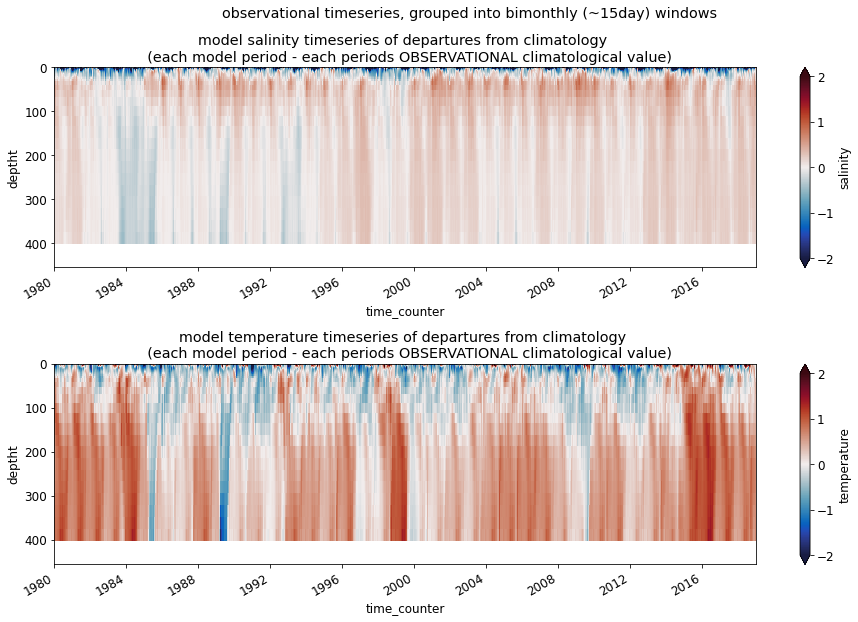

In [84]:
fig, axs = plt.subplots(2,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

xr.plot.pcolormesh(saltts_mod_minus_clim_obs.salinity, ax = axs[0], cmap = cm.balance, vmin = -2, vmax = 2)

xr.plot.pcolormesh(tempts_mod_minus_clim_obs.temperature, ax = axs[1], cmap = cm.balance, vmin = -2, vmax = 2)

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[0].set_title('model salinity timeseries of departures from climatology \n  (each model period - each periods OBSERVATIONAL climatological value)')
axs[1].set_title('model temperature timeseries of departures from climatology \n  (each model period - each periods OBSERVATIONAL climatological value)')

plt.suptitle('observational timeseries, grouped into bimonthly (~15day) windows')
plt.tight_layout()

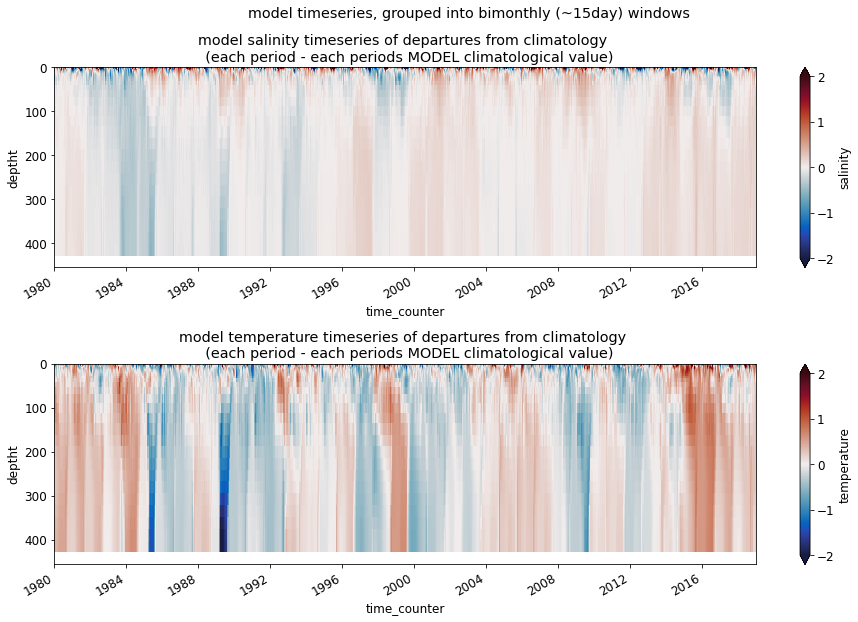

In [85]:
fig, axs = plt.subplots(2,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

xr.plot.pcolormesh(saltts_mod_minus_clim_mod.salinity, ax = axs[0], cmap = cm.balance, vmin = -2, vmax = 2)

xr.plot.pcolormesh(tempts_mod_minus_clim_mod.temperature, ax = axs[1], cmap = cm.balance, vmin = -2, vmax = 2)

axs[0].invert_yaxis()
axs[1].invert_yaxis()
axs[0].set_title('model salinity timeseries of departures from climatology \n  (each period - each periods MODEL climatological value)')
axs[1].set_title('model temperature timeseries of departures from climatology \n  (each period - each periods MODEL climatological value)')

plt.suptitle('model timeseries, grouped into bimonthly (~15day) windows')
plt.tight_layout()